In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

/var/folders/lv/rwsflpyn6g95n7wkdpntsklw0000gn/T/ipykernel_10469/3661915914.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Libraries imported successfully!


In [2]:
try:
    df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
    print(f"Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("File not found. Please check the filename and path.")

Data loaded successfully!
Dataset shape: (1470, 35)


In [3]:
# Cell 3: Initial Data Exploration
print("=== INITIAL DATA EXPLORATION ===")
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset shape:", df.shape)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


=== INITIAL DATA EXPLORATION ===

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470

In [4]:
print("=== DATA QUALITY ASSESSMENT ===")

# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicated rows: {duplicates}")

# Data types
print("\nData types:")
print(df.dtypes)


=== DATA QUALITY ASSESSMENT ===

Missing values per column:
Series([], dtype: int64)
No missing values found!

Duplicated rows: 0

Data types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating

In [5]:
print("=== STATISTICAL SUMMARY ===")

# Numerical columns summary
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)
print("\nNumerical data summary:")
print(df[numerical_cols].describe())

# Categorical columns summary
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns: {categorical_cols}")

for col in categorical_cols:
    print(f"\n{col} - Unique values: {df[col].nunique()}")
    print(df[col].value_counts().head())

# Cell 6: Data Cleaning
print("=== DATA CLEANING ===")

# Create a copy for cleaning
df_clean = df.copy()

# Remove duplicates if any
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

=== STATISTICAL SUMMARY ===
Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Numerical data summary:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.00

In [6]:
constant_cols = [col for col in df_clean.columns if df_clean[col].nunique() == 1]
if constant_cols:
    df_clean = df_clean.drop(columns=constant_cols)
    print(f"Removed constant columns: {constant_cols}")

print(f"Cleaned dataset shape: {df_clean.shape}")

Removed constant columns: ['EmployeeCount', 'Over18', 'StandardHours']
Cleaned dataset shape: (1470, 32)


In [7]:
print("=== FEATURE ENGINEERING ===")

df_transformed = df_clean.copy()

# Create age groups
if 'Age' in df_transformed.columns:
    df_transformed['AgeGroup'] = pd.cut(df_transformed['Age'], 
                                       bins=[0, 25, 35, 45, 55, 100], 
                                       labels=['18-25', '26-35', '36-45', '46-55', '55+'])
    print("Created AgeGroup feature")

# Create distance categories
if 'DistanceFromHome' in df_transformed.columns:
    df_transformed['DistanceCategory'] = pd.cut(df_transformed['DistanceFromHome'],
                                               bins=[0, 5, 15, 30],
                                               labels=['Near', 'Medium', 'Far'])
    print("Created DistanceCategory feature")

# Create salary categories (if DailyRate exists)
if 'DailyRate' in df_transformed.columns:
    df_transformed['SalaryCategory'] = pd.cut(df_transformed['DailyRate'],
                                             bins=[0, 500, 1000, 1500, 2000],
                                             labels=['Low', 'Medium', 'High', 'Very High'])
    print("Created SalaryCategory feature")

# Convert Yes/No to binary
binary_cols = ['Attrition']
for col in binary_cols:
    if col in df_transformed.columns:
        df_transformed[col + '_Binary'] = df_transformed[col].map({'Yes': 1, 'No': 0})
        print(f"Created binary version of {col}")

print(f"Transformed dataset shape: {df_transformed.shape}")


=== FEATURE ENGINEERING ===
Created AgeGroup feature
Created DistanceCategory feature
Created SalaryCategory feature
Created binary version of Attrition
Transformed dataset shape: (1470, 36)


In [8]:
print("=== DATA ENCODING ===")

df_encoded = df_transformed.copy()

# Label encoding for categorical variables
label_encoders = {}
categorical_to_encode = [col for col in categorical_cols if col in df_encoded.columns]

for col in categorical_to_encode:
    le = LabelEncoder()
    df_encoded[col + '_Encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"Label encoded: {col}")

# One-hot encoding for selected categorical variables
if 'Department' in df_encoded.columns:
    dept_dummies = pd.get_dummies(df_encoded['Department'], prefix='Dept')
    df_encoded = pd.concat([df_encoded, dept_dummies], axis=1)
    print("One-hot encoded Department")

if 'BusinessTravel' in df_encoded.columns:
    travel_dummies = pd.get_dummies(df_encoded['BusinessTravel'], prefix='Travel')
    df_encoded = pd.concat([df_encoded, travel_dummies], axis=1)
    print("One-hot encoded BusinessTravel")

print(f"Encoded dataset shape: {df_encoded.shape}")


=== DATA ENCODING ===
Label encoded: Attrition
Label encoded: BusinessTravel
Label encoded: Department
Label encoded: EducationField
Label encoded: Gender
Label encoded: JobRole
Label encoded: MaritalStatus
Label encoded: OverTime
One-hot encoded Department
One-hot encoded BusinessTravel
Encoded dataset shape: (1470, 50)


In [9]:
print("=== DATA ENCODING ===")

df_encoded = df_transformed.copy()

# Label encoding for categorical variables
label_encoders = {}
categorical_to_encode = [col for col in categorical_cols if col in df_encoded.columns]

for col in categorical_to_encode:
    le = LabelEncoder()
    df_encoded[col + '_Encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"Label encoded: {col}")

# One-hot encoding for selected categorical variables
if 'Department' in df_encoded.columns:
    dept_dummies = pd.get_dummies(df_encoded['Department'], prefix='Dept')
    df_encoded = pd.concat([df_encoded, dept_dummies], axis=1)
    print("One-hot encoded Department")

if 'BusinessTravel' in df_encoded.columns:
    travel_dummies = pd.get_dummies(df_encoded['BusinessTravel'], prefix='Travel')
    df_encoded = pd.concat([df_encoded, travel_dummies], axis=1)
    print("One-hot encoded BusinessTravel")

print(f"Encoded dataset shape: {df_encoded.shape}")


=== DATA ENCODING ===
Label encoded: Attrition
Label encoded: BusinessTravel
Label encoded: Department
Label encoded: EducationField
Label encoded: Gender
Label encoded: JobRole
Label encoded: MaritalStatus
Label encoded: OverTime
One-hot encoded Department
One-hot encoded BusinessTravel
Encoded dataset shape: (1470, 50)


In [10]:
print("=== DATA SCALING ===")

# Select numerical columns for scaling
numerical_cols_to_scale = ['Age', 'DailyRate', 'DistanceFromHome']
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col in df_encoded.columns]

if numerical_cols_to_scale:
    scaler = StandardScaler()
    df_scaled = df_encoded.copy()
    
    # Create scaled versions
    scaled_features = scaler.fit_transform(df_encoded[numerical_cols_to_scale])
    scaled_df = pd.DataFrame(scaled_features, 
                            columns=[col + '_Scaled' for col in numerical_cols_to_scale],
                            index=df_encoded.index)
    
    df_scaled = pd.concat([df_scaled, scaled_df], axis=1)
    print(f"Scaled features: {numerical_cols_to_scale}")
    print(f"Final dataset shape: {df_scaled.shape}")
else:
    df_scaled = df_encoded.copy()
    print("No numerical columns found for scaling")

=== DATA SCALING ===
Scaled features: ['Age', 'DailyRate', 'DistanceFromHome']
Final dataset shape: (1470, 53)


=== DATA VISUALIZATION ===


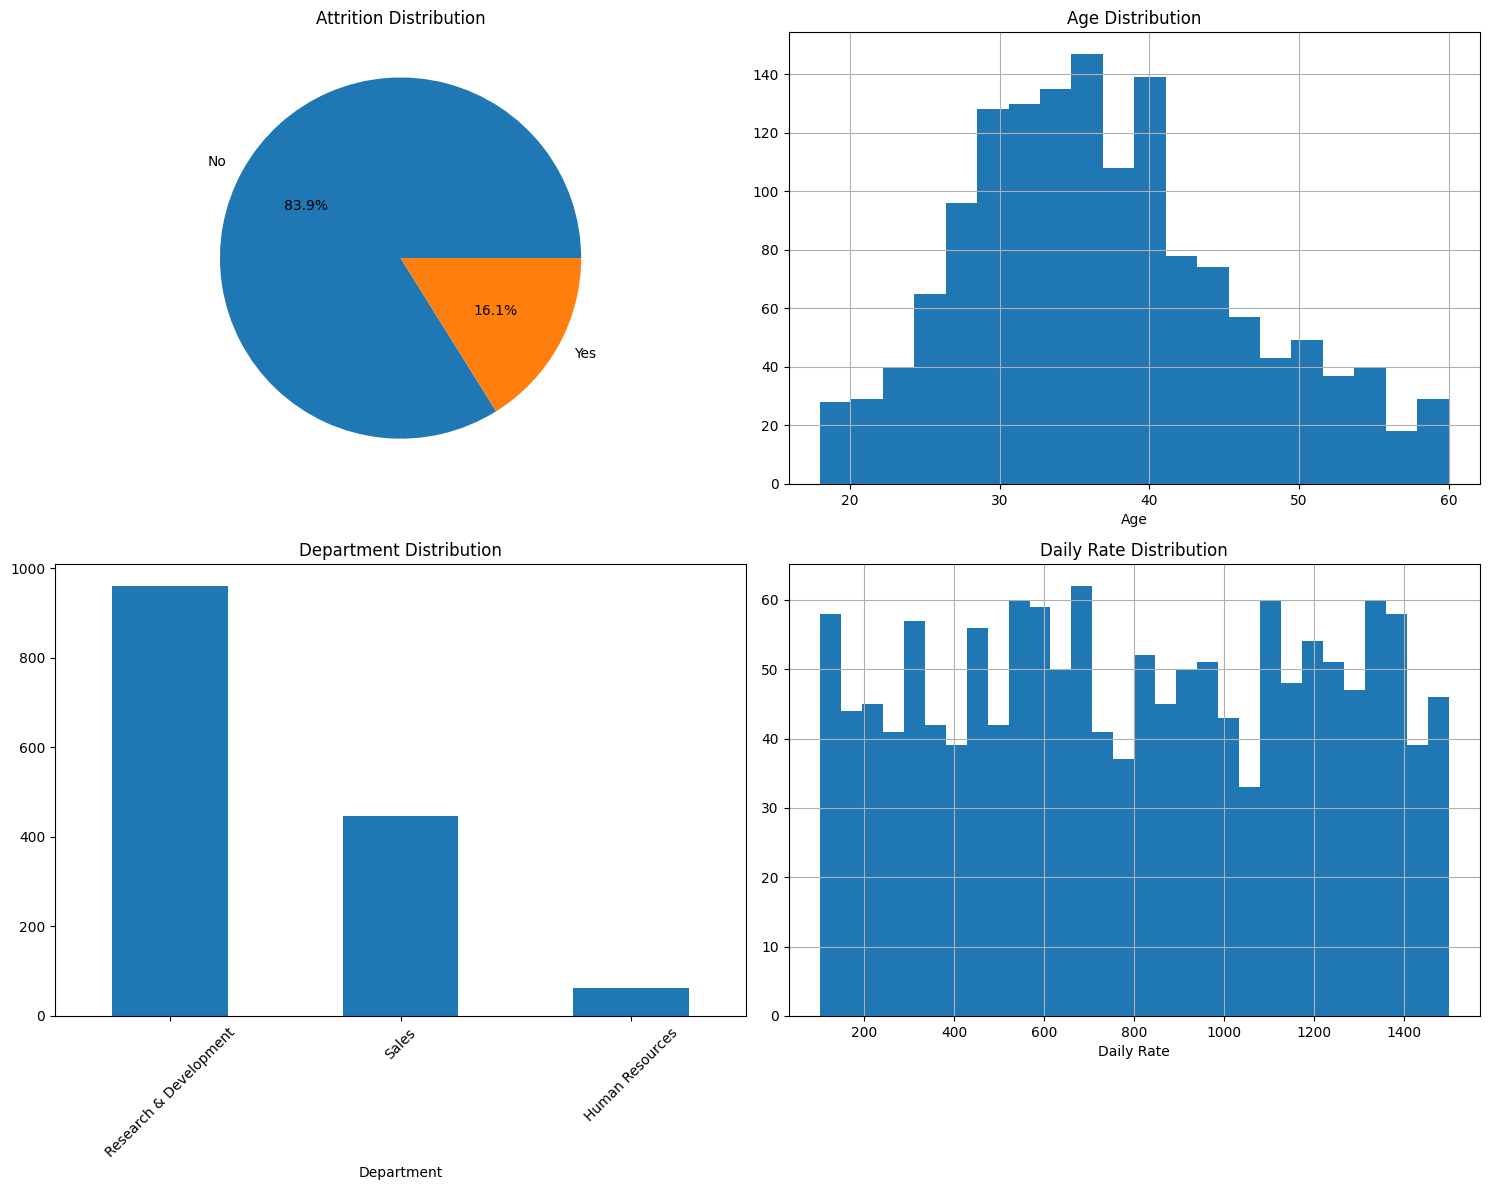

=== ADVANCED ANALYTICS ===


KeyError: "['EmployeeCount', 'StandardHours'] not in index"

<Figure size 1000x800 with 0 Axes>

In [12]:
# Cell 10: Data Visualization
print("=== DATA VISUALIZATION ===")

# Set up plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Attrition distribution
if 'Attrition' in df_clean.columns:
    df_clean['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0,0])
    axes[0,0].set_title('Attrition Distribution')
    axes[0,0].set_ylabel('')

# Plot 2: Age distribution
if 'Age' in df_clean.columns:
    df_clean['Age'].hist(bins=20, ax=axes[0,1])
    axes[0,1].set_title('Age Distribution')
    axes[0,1].set_xlabel('Age')

# Plot 3: Department distribution
if 'Department' in df_clean.columns:
    df_clean['Department'].value_counts().plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Department Distribution')
    axes[1,0].tick_params(axis='x', rotation=45)

# Plot 4: Daily Rate distribution
if 'DailyRate' in df_clean.columns:
    df_clean['DailyRate'].hist(bins=30, ax=axes[1,1])
    axes[1,1].set_title('Daily Rate Distribution')
    axes[1,1].set_xlabel('Daily Rate')

plt.tight_layout()
plt.show()

# Cell 11: Advanced Analytics
print("=== ADVANCED ANALYTICS ===")

# Correlation analysis
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df_clean[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
    
# Attrition analysis by different factors
if 'Attrition' in df_clean.columns:
    print("\nAttrition Analysis:")
    
    # Attrition by Department
    if 'Department' in df_clean.columns:
        attrition_dept = pd.crosstab(df_clean['Department'], df_clean['Attrition'], normalize='index') * 100
        print("\nAttrition Rate by Department:")
        print(attrition_dept)
    
    # Attrition by Business Travel
    if 'BusinessTravel' in df_clean.columns:
        attrition_travel = pd.crosstab(df_clean['BusinessTravel'], df_clean['Attrition'], normalize='index') * 100
        print("\nAttrition Rate by Business Travel:")
        print(attrition_travel)

In [13]:
# Cell 12: Export Cleaned Data
print("=== DATA EXPORT ===")

# Save the processed datasets
df_clean.to_csv('employee_data_cleaned.csv', index=False)
df_transformed.to_csv('employee_data_transformed.csv', index=False)
df_scaled.to_csv('employee_data_final.csv', index=False)

print("Datasets exported:")
print("- employee_data_cleaned.csv (basic cleaning)")
print("- employee_data_transformed.csv (with feature engineering)")
print("- employee_data_final.csv (fully processed)")

# Summary statistics
print(f"\nETL Pipeline Complete!")
print(f"Original dataset: {df.shape}")
print(f"Final dataset: {df_scaled.shape}")
print(f"Features added: {df_scaled.shape[1] - df.shape[1]}")

# Cell 13: Data Quality Report
print("=== FINAL DATA QUALITY REPORT ===")

def data_quality_report(dataframe, name):
    print(f"\n{name} Dataset Quality Report:")
    print("-" * 40)
    print(f"Shape: {dataframe.shape}")
    print(f"Missing values: {dataframe.isnull().sum().sum()}")
    print(f"Duplicate rows: {dataframe.duplicated().sum()}")
    print(f"Memory usage: {dataframe.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Data types breakdown
    dtype_counts = dataframe.dtypes.value_counts()
    print(f"Data types: {dict(dtype_counts)}")

# Generate reports
data_quality_report(df, "Original")
data_quality_report(df_clean, "Cleaned")
data_quality_report(df_scaled, "Final Processed")

print("\n=== ETL PIPELINE COMPLETED SUCCESSFULLY! ===")

=== DATA EXPORT ===
Datasets exported:
- employee_data_cleaned.csv (basic cleaning)
- employee_data_transformed.csv (with feature engineering)
- employee_data_final.csv (fully processed)

ETL Pipeline Complete!
Original dataset: (1470, 35)
Final dataset: (1470, 53)
Features added: 18
=== FINAL DATA QUALITY REPORT ===

Original Dataset Quality Report:
----------------------------------------
Shape: (1470, 35)
Missing values: 0
Duplicate rows: 0
Memory usage: 1.02 MB
Data types: {dtype('int64'): 26, dtype('O'): 9}

Cleaned Dataset Quality Report:
----------------------------------------
Shape: (1470, 32)
Missing values: 0
Duplicate rows: 0
Memory usage: 0.92 MB
Data types: {dtype('int64'): 24, dtype('O'): 8}

Final Processed Dataset Quality Report:
----------------------------------------
Shape: (1470, 53)
Missing values: 0
Duplicate rows: 0
Memory usage: 1.07 MB
Data types: {dtype('int64'): 33, dtype('O'): 8, dtype('bool'): 6, dtype('float64'): 3, CategoricalDtype(categories=['18-25', '